In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV



In [17]:
# Data Exploration

In [18]:
# Load dataset
df = pd.read_csv('diabetes_indicators.csv')

# Display dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253685 entries, 0 to 253684
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          251148 non-null  float64
 1   HighBP                251148 non-null  float64
 2   HighChol              251148 non-null  float64
 3   CholCheck             253685 non-null  float64
 4   BMI                   253685 non-null  float64
 5   Smoker                253685 non-null  float64
 6   Stroke                253685 non-null  float64
 7   HeartDiseaseorAttack  253685 non-null  float64
 8   PhysActivity          253685 non-null  float64
 9   Fruits                253685 non-null  float64
 10  Veggies               253685 non-null  float64
 11  HvyAlcoholConsump     253685 non-null  float64
 12  AnyHealthcare         253685 non-null  float64
 13  NoDocbcCost           253685 non-null  float64
 14  GenHlth               253685 non-null  float64
 15  

In [19]:
# Summary statistics
print(df.describe())

        Diabetes_012         HighBP       HighChol      CholCheck  \
count  251148.000000  251148.000000  251148.000000  253685.000000   
mean        0.296582       0.428851       0.423953       0.962670   
std         0.697814       0.494913       0.494184       0.189569   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253685.000000  253685.000000  253685.000000         253685.000000   
mean       28.382321       0.443168       0.040570              0.094184   
std         6.608654       0.496761       0.197292              0.292085   
min        12.000000       0.000000       0.000000              0.000000  

In [20]:
# Preprocessing

In [21]:
# Check null values
print(df.isnull().sum())


Diabetes_012            2537
HighBP                  2537
HighChol                2537
CholCheck                  0
BMI                        0
Smoker                     0
Stroke                     0
HeartDiseaseorAttack       0
PhysActivity               0
Fruits                     0
Veggies                    0
HvyAlcoholConsump          0
AnyHealthcare              0
NoDocbcCost                0
GenHlth                    0
MentHlth                   0
PhysHlth                   0
DiffWalk                   0
Sex                        0
Age                        0
Education                  0
Income                     0
dtype: int64


In [22]:
#checking unique values in different variables
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_012,3
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [23]:
# Check and drop duplicats
df.duplicated().sum()
df.drop_duplicates(inplace = True)
df.duplicated().sum()

np.int64(0)

In [24]:
#check for NAs
print(df.isnull().sum())
df = df.dropna()

Diabetes_012            2508
HighBP                  2508
HighChol                2508
CholCheck                  0
BMI                        0
Smoker                     0
Stroke                     0
HeartDiseaseorAttack       0
PhysActivity               0
Fruits                     0
Veggies                    0
HvyAlcoholConsump          0
AnyHealthcare              0
NoDocbcCost                0
GenHlth                    0
MentHlth                   0
PhysHlth                   0
DiffWalk                   0
Sex                        0
Age                        0
Education                  0
Income                     0
dtype: int64


In [25]:
#Transform the data to integer

df["Diabetes_012"] = df["Diabetes_012"].astype(int)
df["HighBP"] = df["HighBP"].astype(int)
df["HighChol"] = df["HighChol"].astype(int)
df["CholCheck"] = df["CholCheck"].astype(int)
df["BMI"] = df["BMI"].astype(int)
df["Smoker"] = df["Smoker"].astype(int)
df["Stroke"] = df["Stroke"].astype(int)
df["HeartDiseaseorAttack"] = df["HeartDiseaseorAttack"].astype(int)
df["PhysActivity"] = df["PhysActivity"].astype(int)
df["Fruits"] = df["Fruits"].astype(int)
df["Veggies"] = df["Veggies"].astype(int)
df["HvyAlcoholConsump"] = df["HvyAlcoholConsump"].astype(int)
df["AnyHealthcare"] = df["AnyHealthcare"].astype(int)
df["NoDocbcCost"] = df["NoDocbcCost"].astype(int)
df["GenHlth"] = df["GenHlth"].astype(int)
df["MentHlth"] = df["MentHlth"].astype(int)
df["PhysHlth"] = df["PhysHlth"].astype(int)
df["DiffWalk"] = df["DiffWalk"].astype(int)
df["Sex"] = df["Sex"].astype(int)
df["Age"] = df["Age"].astype(int)
df["Education"] = df["Education"].astype(int)
df["Income"] = df["Income"].astype(int)

<ipython-input-25-ddbc6f8c6bb8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Diabetes_012"] = df["Diabetes_012"].astype(int)
<ipython-input-25-ddbc6f8c6bb8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["HighBP"] = df["HighBP"].astype(int)
<ipython-input-25-ddbc6f8c6bb8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

<ipython-input-26-5687f73dcd5d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, data=df, palette='Set2')
<ipython-input-26-5687f73dcd5d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, data=df, palette='Set2')
<ipython-input-26-5687f73dcd5d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, data=df, palette='Set2')
<ipython-input-26-5687f73dcd5d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same

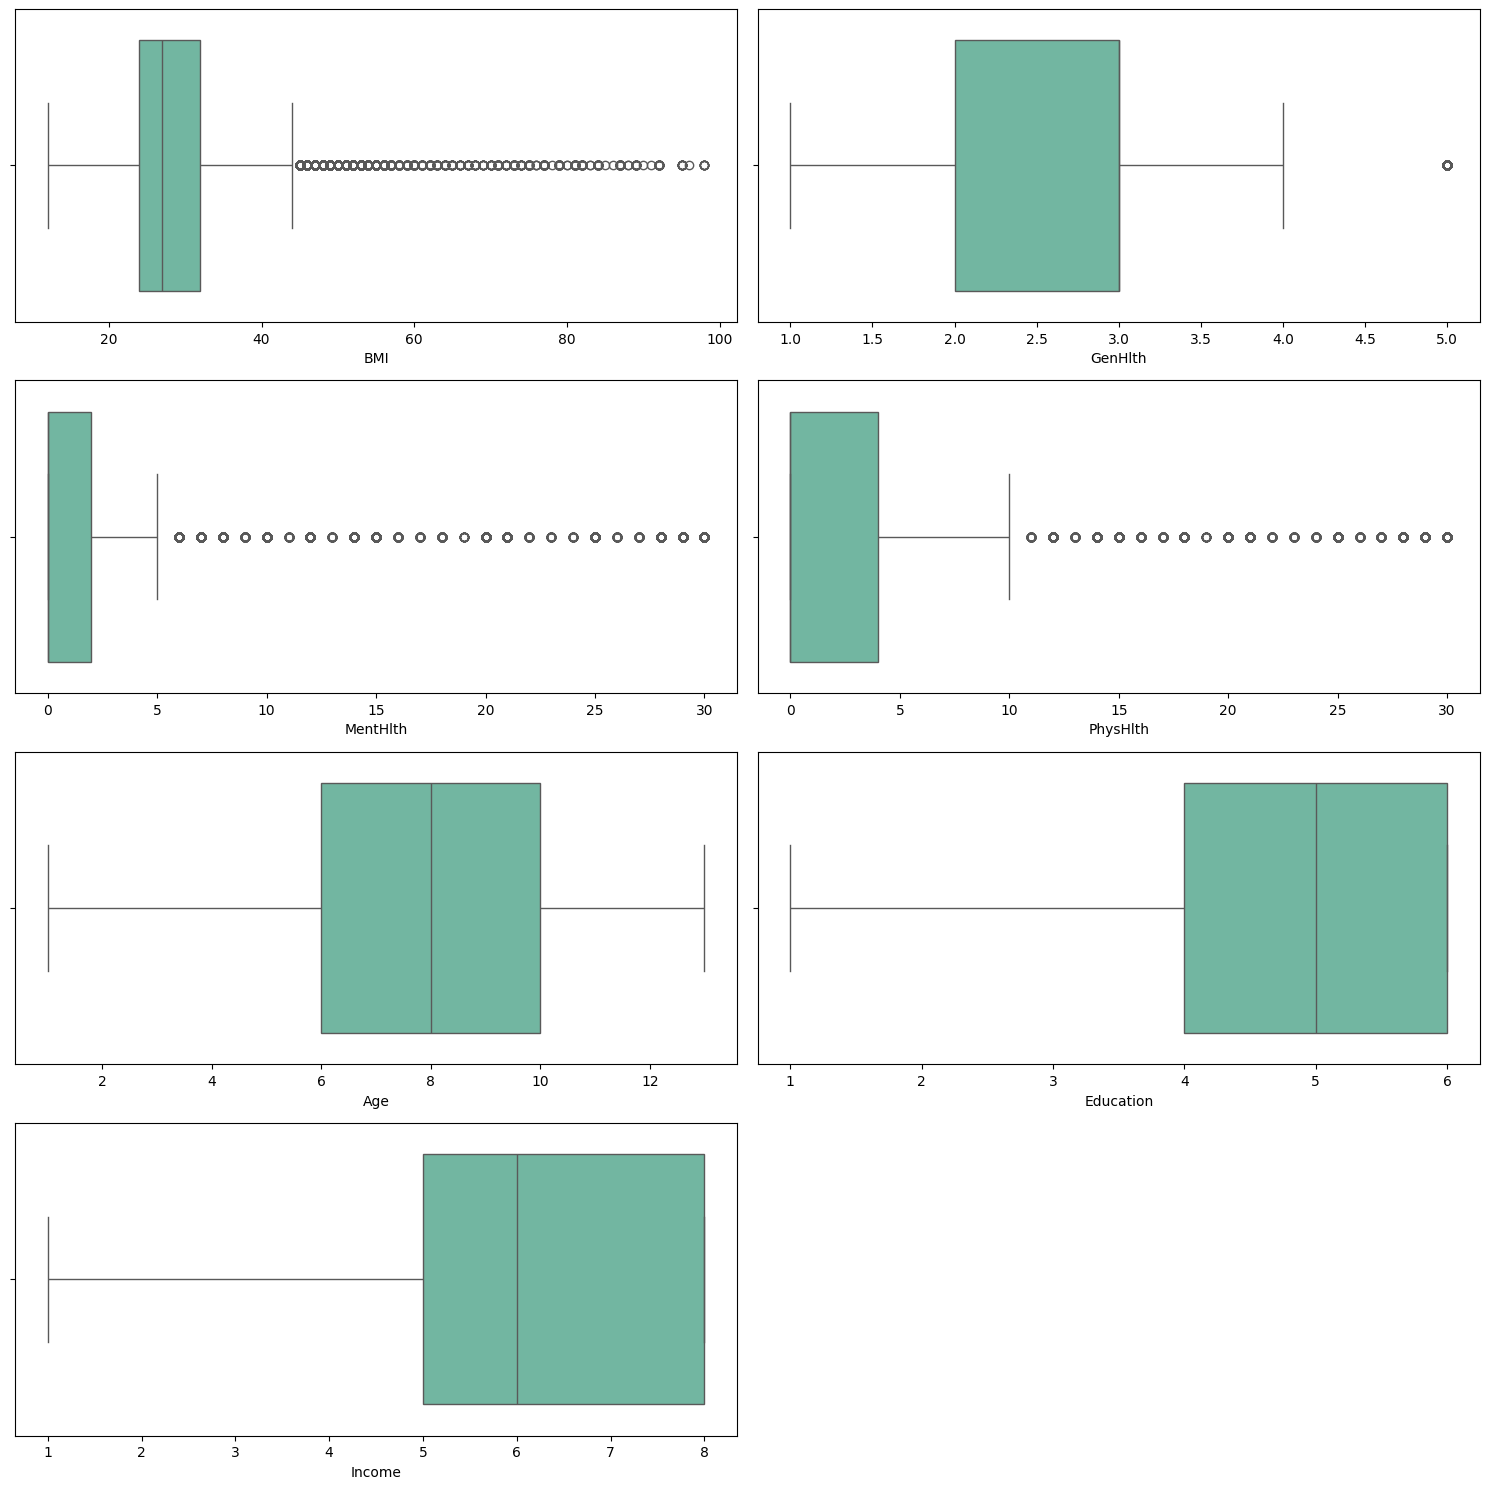

In [26]:
# Check for Outliers
plt.figure(figsize=(15, 15))
for i, col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=col, data=df, palette='Set2')
plt.tight_layout()
plt.show()

In [27]:
# EDA

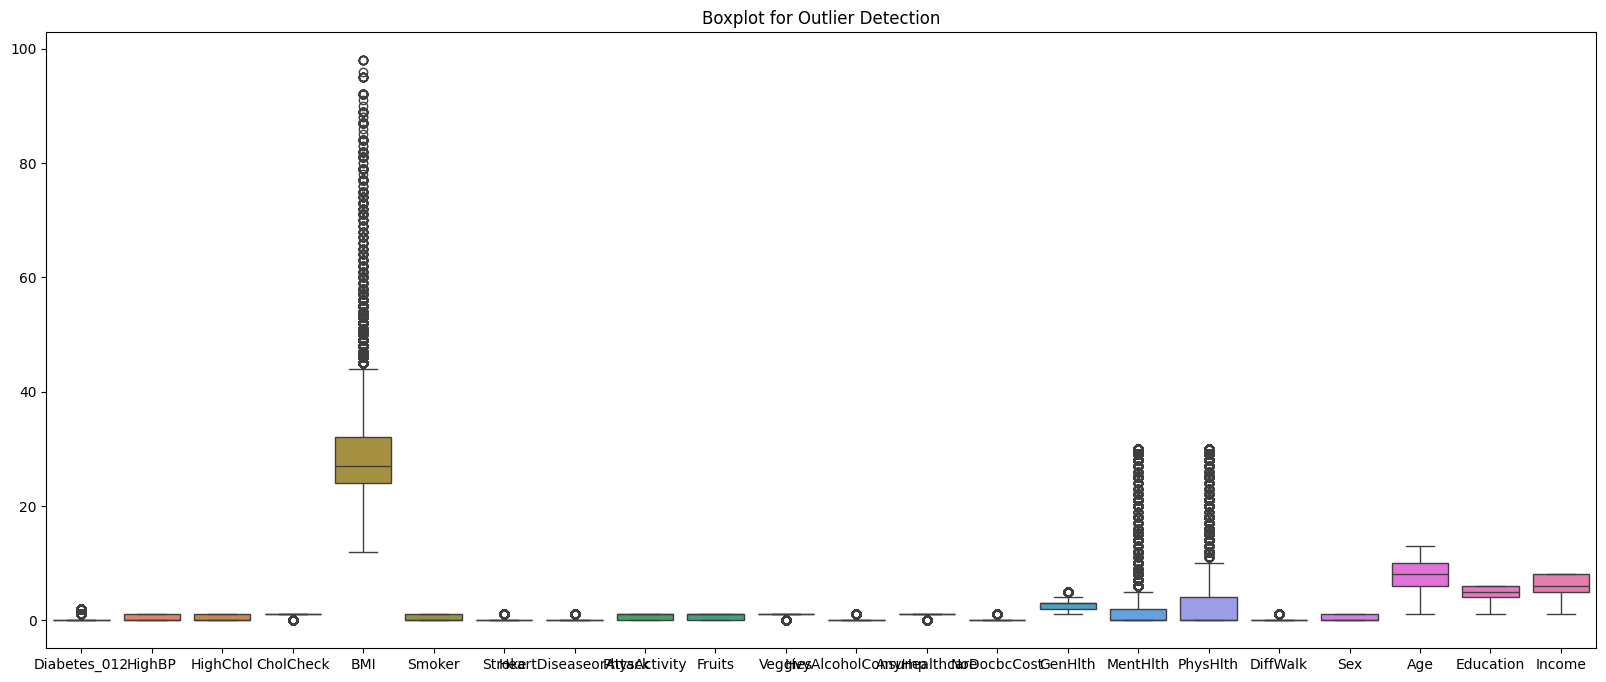

In [28]:
# Outlier detection (boxplot for visualizing)
plt.figure(figsize=(20, 8))
sns.boxplot(data=df)
plt.title('Boxplot for Outlier Detection')
plt.show()

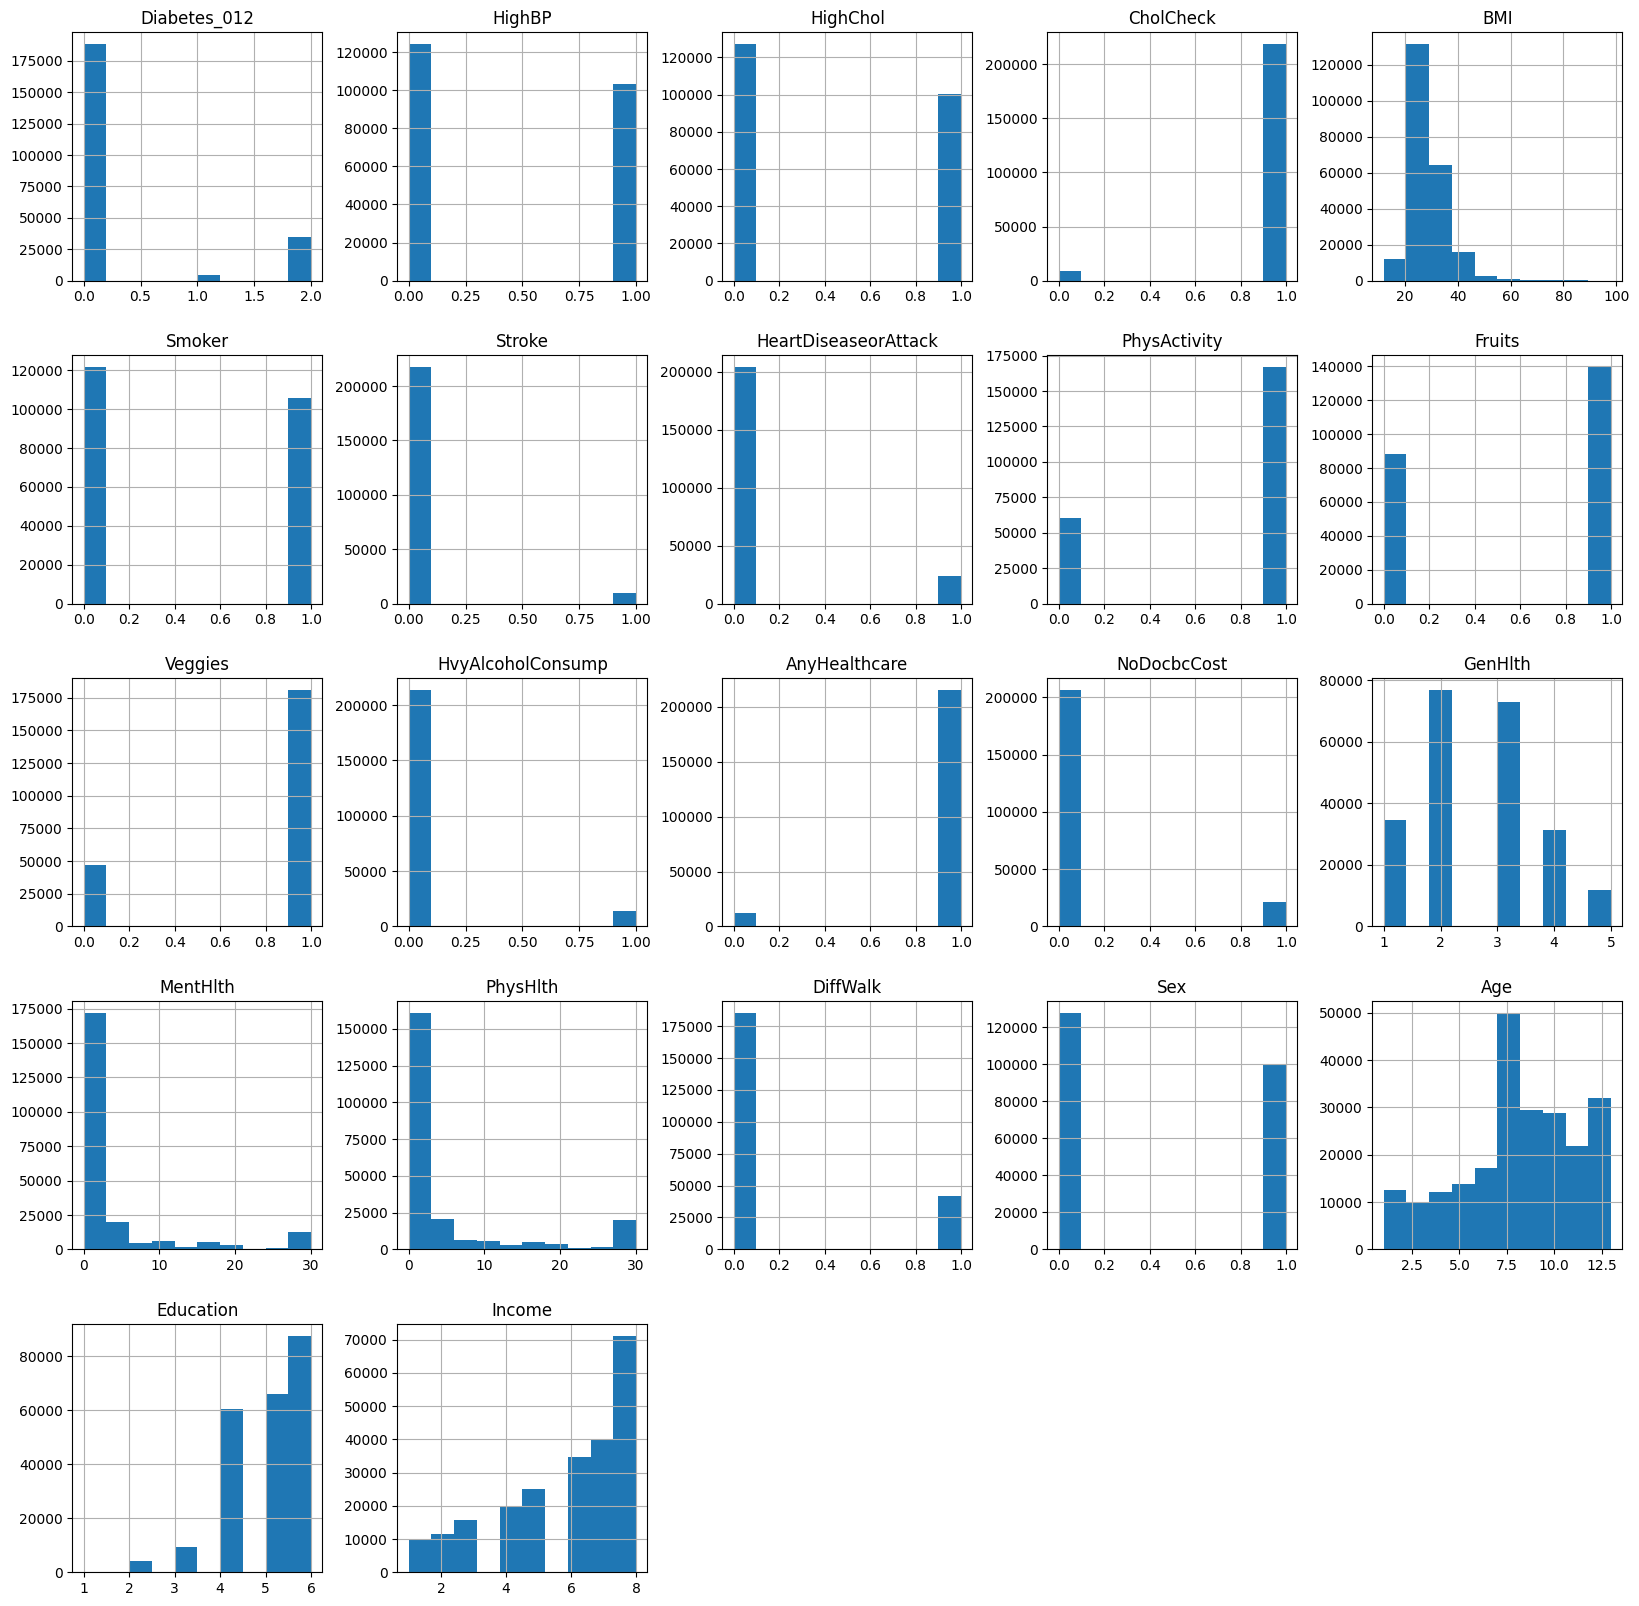

In [29]:
# Histograms for numeric columns
df.hist(figsize = (20,20))
plt.show()

Text(0.5, 1.0, 'correlation Heatmap')

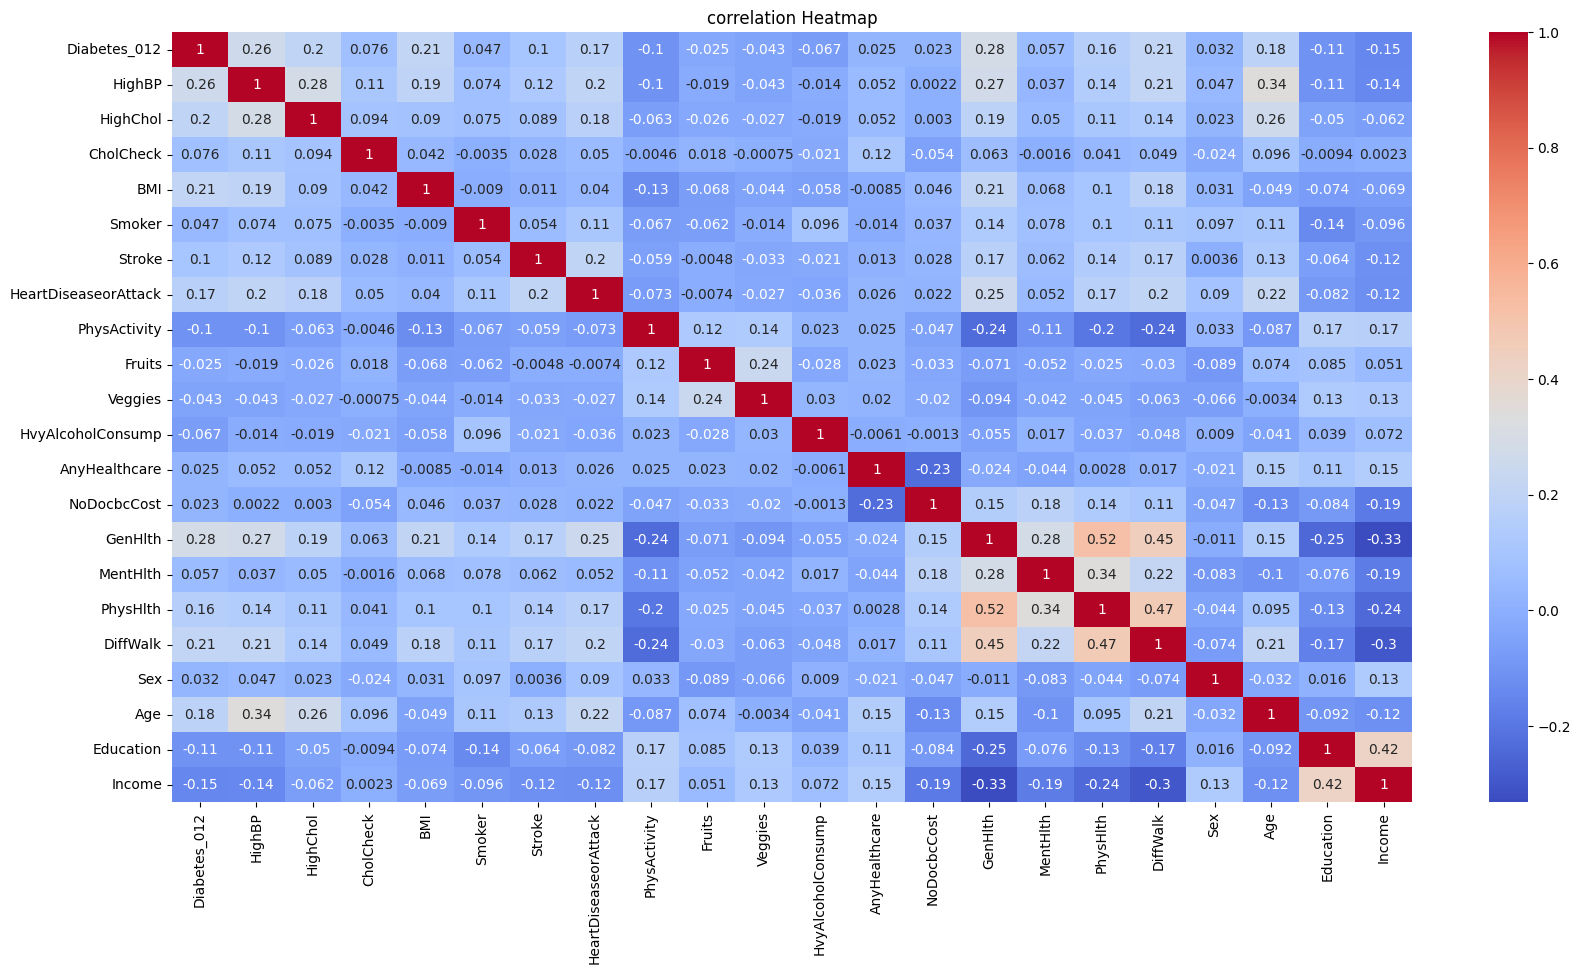

In [30]:
# Correlation analysis using Heatmap


plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True , cmap ='coolwarm' )
plt.title("correlation Heatmap")

In [32]:
# Binary feature columns to analyze
cols = [ 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies',
        'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']
# Function to create a pivot table for plotting
def create_plot_pivot(df, x_column):
    """Create pivot table for Diabetes_012 vs another feature"""
    temp = df.groupby([x_column, 'Diabetes_012']).size().reset_index(name='count')
    pivot = temp.pivot(index=x_column, columns='Diabetes_012', values='count')
    return pivot


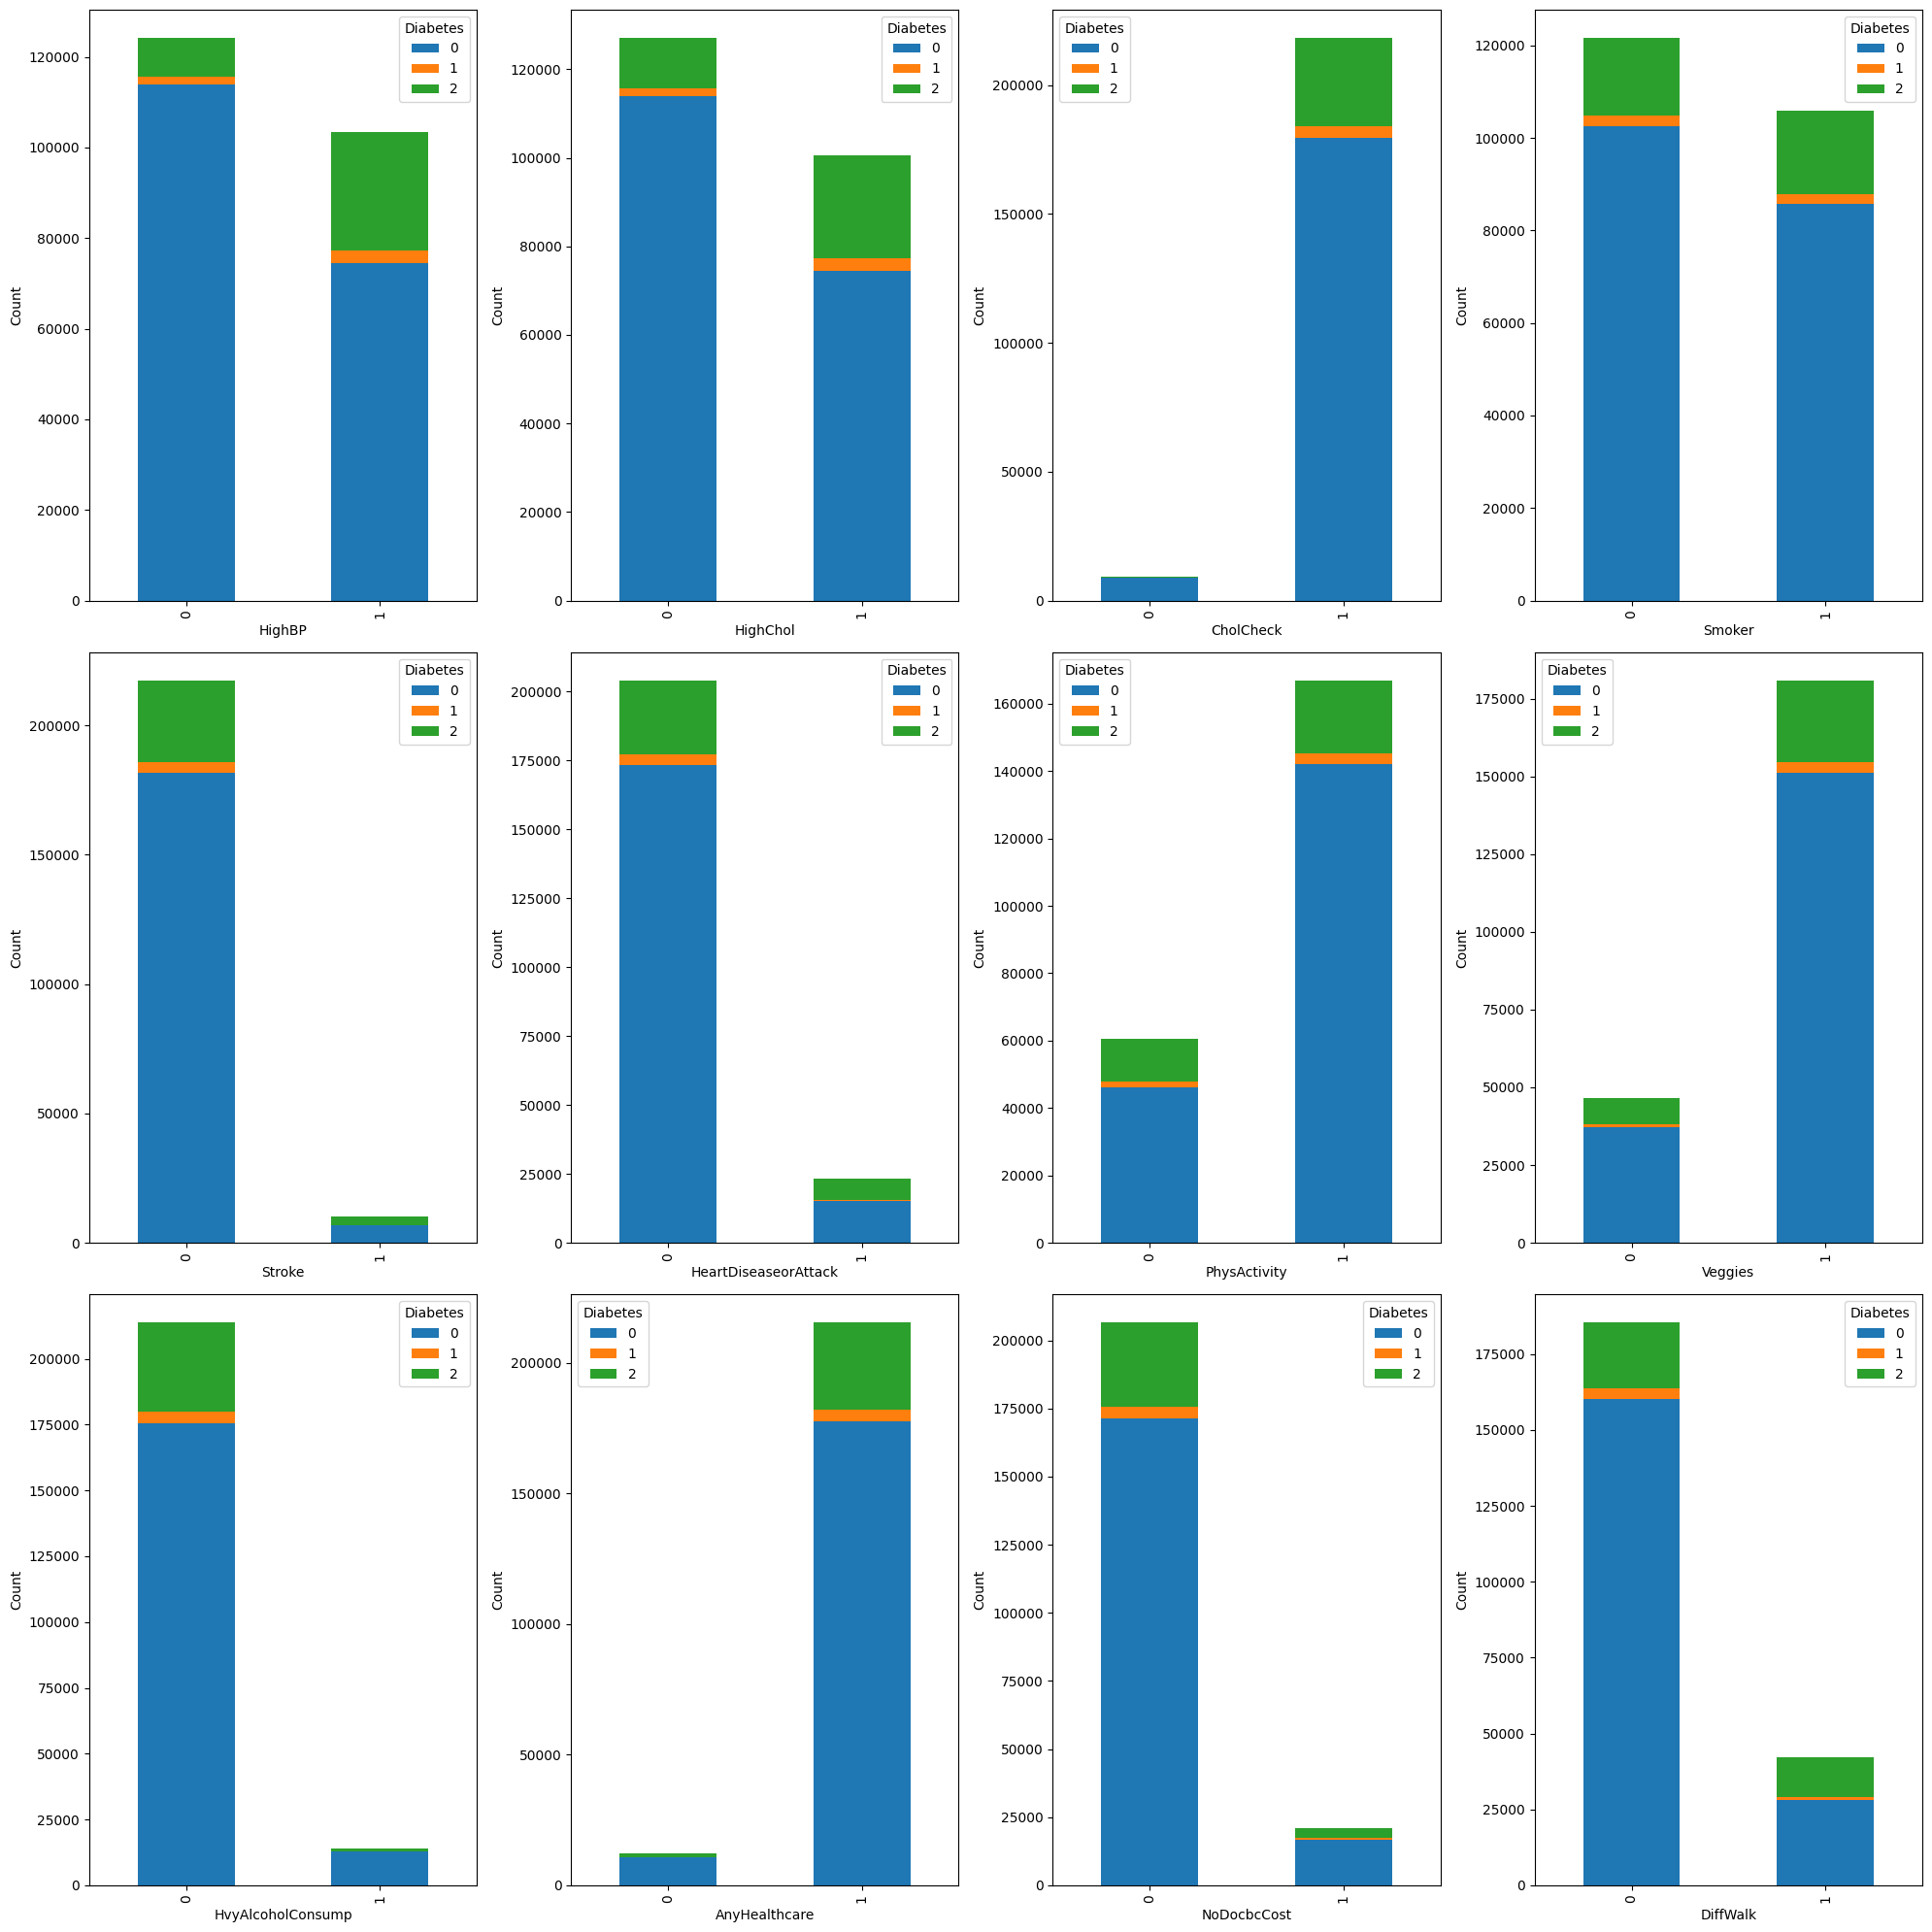

In [33]:
# Create stacked bar plots for each feature
fig, ax = plt.subplots(3, 4, figsize=(20, 20))
axes = ax.ravel()

for i, col in enumerate(cols):
    pivot_table = create_plot_pivot(df, col)
    pivot_table.plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Diabetes')

plt.tight_layout()
plt.show()

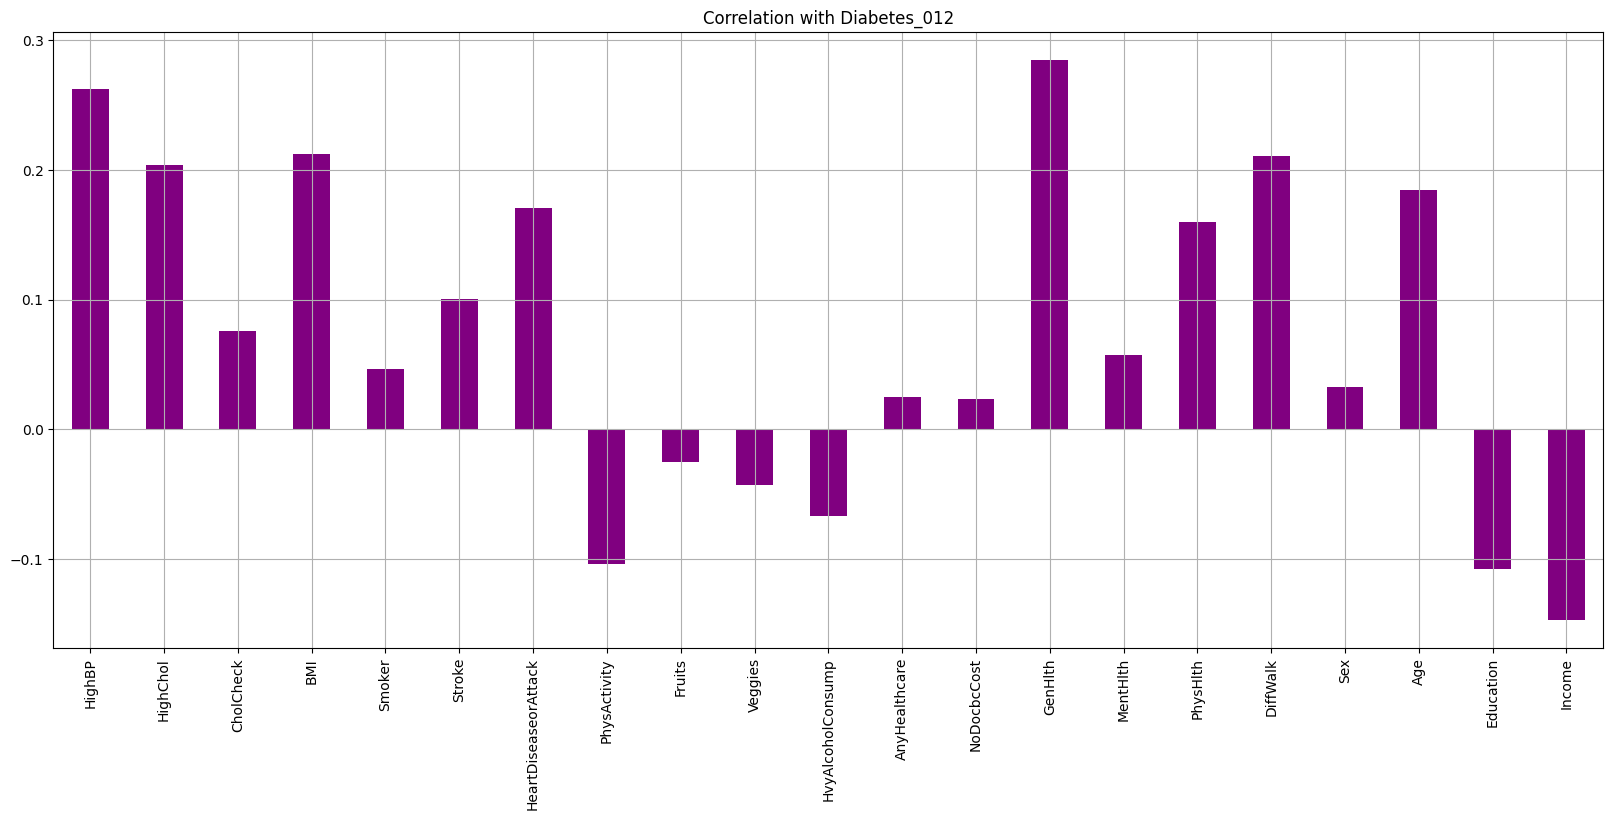

In [34]:
# Feature Selections

df.drop('Diabetes_012', axis=1).corrwith(df.Diabetes_012).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes_012",color="Purple");

In [35]:
# Splitting data for the training

from sklearn.model_selection import train_test_split
X = df.drop('Diabetes_012', axis = 1)
y = df['Diabetes_012']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)


In [36]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [37]:
# Data Scalling
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [38]:
# Modeling

In [39]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=200)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=200, solver='liblinear')

Accuracy: 83.18%
Accuracy: 83.24%


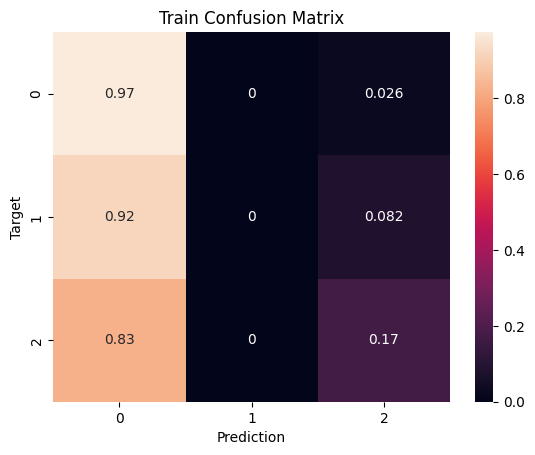

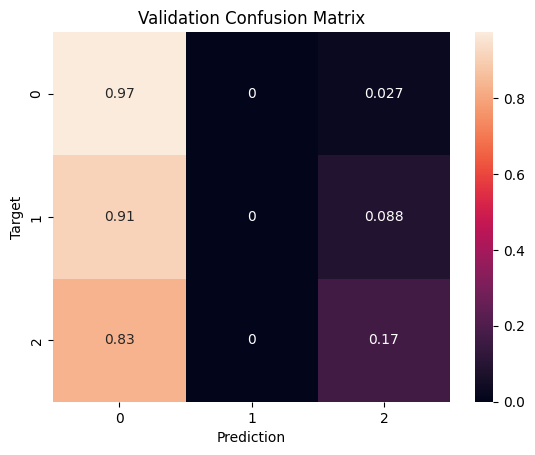

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

def predict_and_plot(model, inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))

    return preds

# Predict and plot on the training data
train_preds = predict_and_plot(log_reg, X_train, y_train, 'Train')

# Predict and plot on the validation data
val_preds = predict_and_plot(log_reg, X_test, y_test, 'Validation')


In [41]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
model_2 = RandomForestClassifier(n_jobs =-1, random_state = 42)
model_2.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [42]:
# make predictions on test set
y_pred=model_2.predict(X_test)

print('Training set accuracy: {:.4f}'.format(model_2.score(X_train, y_train)))

print('Test set accuracy: {:.4f}'.format(model_2.score(X_test, y_test)))


Training set accuracy: 0.9934
Test set accuracy: 0.8251


In [45]:
# descion tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier( max_depth= 12)
dt.fit(X_train , y_train)

# make predictions on test set
train_accuracy = dt.score(X_train, y_train)
test_accuracy = dt.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.8475814380104465
Test Accuracy: 0.8256733599894547


In [44]:
# KNN
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

y_pred=knn.predict(X_test)
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))



Training set score: 0.8503
Test set score: 0.8248


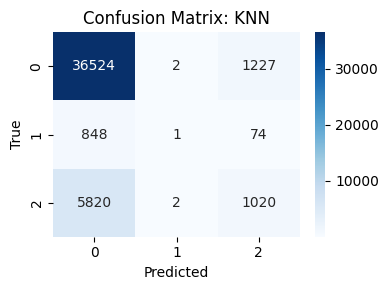

In [46]:
# calculating and plotting the confusion matrix

confusion = confusion_matrix(y_test, y_pred)

# plot
plt.figure(figsize=(4, 3))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

Training set score: 0.8447
Test set score: 0.8349


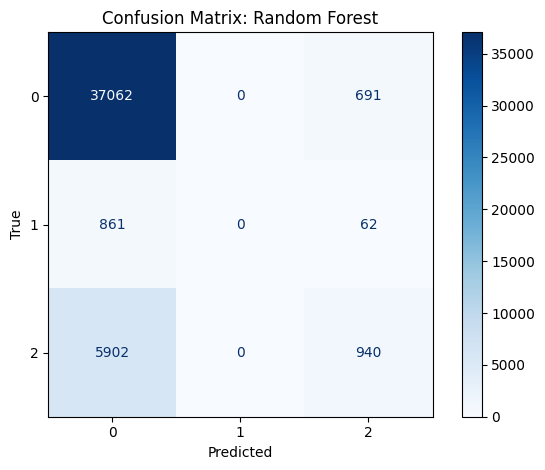

In [47]:
# Random Forest
rf = RandomForestClassifier(max_depth=12, n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

# make predictions on test set
y_pred=rf.predict(X_test)

print('Training set score: {:.4f}'.format(rf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(rf.score(X_test, y_test)))


# calculating and plotting the confusion matrix

cm1 = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix: Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()


Training set score: 0.8391
Test set score: 0.8295


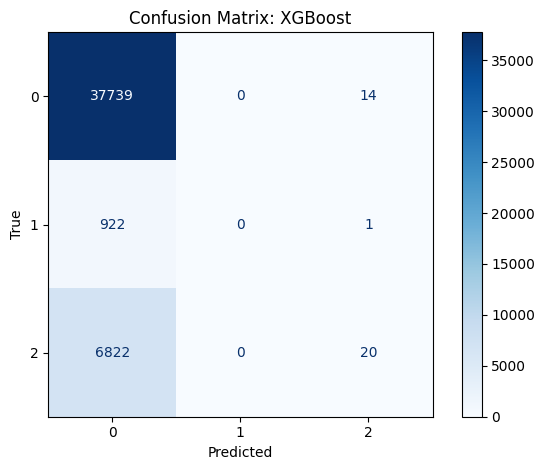

In [48]:
#XGBoost

from xgboost import XGBClassifier
xg = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
xg.fit(X_train , y_train)
y_pred=xg.predict(X_test)

print('Training set score: {:.4f}'.format(xg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(xg.score(X_test, y_test)))

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix: XGBoost')
plt.xlabel('Predicted')
plt.ylabel(True)
plt.tight_layout()
plt.show()


In [49]:
import joblib

joblib.dump(xg, "xgboost_model.pkl")
joblib.dump(scalar, "scaler.pkl")


['scaler.pkl']

In [50]:
#validation

from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.47
Recall: 0.33


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
